In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
df = pd.read_csv('Student Study data.csv')
df.head()

,Name,Date,Day,Marital Status,Your gender?,study hour,your sleep hour?,weekend,what is your age?,what is your cgpa
0,Karim,28/6/2022,Sunday,1.0,1,4.0,6,0,23,3.00 - 3.49
1,Karim,29/6/2022,Monday,1.0,1,3.0,6,0,23,3.00 - 3.49
2,Karim,30/6/2022,Tuesday,1.0,1,3.0,7,0,23,3.00 - 3.49
3,Karim,1/7/2022,Wednesday,1.0,1,2.0,5,0,23,3.00 - 3.49
4,Karim,2/7/2022,Thursday,1.0,1,5.0,6,0,23,3.00 - 3.49


In [3]:
df.describe()

,Marital Status,Your gender?,study hour,your sleep hour?,weekend,what is your age?
count,59.000000,63.000000,62.000000,63.000000,63.000000,63.000000
mean,1.322034,1.777778,3.241935,6.142857,0.285714,22.444444
std,0.471267,0.419079,1.363283,0.715207,0.455383,0.963491
min,1.000000,1.000000,1.000000,5.000000,0.000000,21.000000
25%,1.000000,2.000000,2.000000,6.000000,0.000000,22.000000
50%,1.000000,2.000000,3.000000,6.000000,0.000000,23.000000
75%,2.000000,2.000000,4.000000,7.000000,1.000000,23.000000
max,2.000000,2.000000,6.000000,8.000000,1.000000,24.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               63 non-null     object 
 1   Date               63 non-null     object 
 2   Day                63 non-null     object 
 3   Marital Status     59 non-null     float64
 4   Your gender?       63 non-null     int64  
 5   study hour         62 non-null     float64
 6   your sleep hour?   63 non-null     int64  
 7   weekend            63 non-null     int64  
 8   what is your age?  63 non-null     int64  
 9   what is your cgpa  63 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.0+ KB


In [5]:
# if you want to see who have null values
#df[df['Marital Status'].isna()]

# to replace with mean value

In [6]:
df.isnull().sum()

Name                 0
Date                 0
Day                  0
Marital Status       4
Your gender?         0
study hour           1
your sleep hour?     0
weekend              0
what is your age?    0
what is your cgpa    0
dtype: int64

In [7]:
#Remove all empty and null values
df = df.dropna()

In [8]:
df.isnull().sum()

Name                 0
Date                 0
Day                  0
Marital Status       0
Your gender?         0
study hour           0
your sleep hour?     0
weekend              0
what is your age?    0
what is your cgpa    0
dtype: int64

In [9]:
# Let's rename some columns
df.rename(columns = {'Marital Status':'Marital_Status', 'Your gender?':'Gender', 'study hour':'Study_hours', 'your sleep hour?':'Sleep_hours', 'weekend':'Weekend', 'what is your age?':'Age', 'what is your cgpa':'CGPA'}, inplace = True)

In [10]:
df.head()

,Name,Date,Day,Marital_Status,Gender,Study_hours,Sleep_hours,Weekend,Age,CGPA
0,Karim,28/6/2022,Sunday,1.0,1,4.0,6,0,23,3.00 - 3.49
1,Karim,29/6/2022,Monday,1.0,1,3.0,6,0,23,3.00 - 3.49
2,Karim,30/6/2022,Tuesday,1.0,1,3.0,7,0,23,3.00 - 3.49
3,Karim,1/7/2022,Wednesday,1.0,1,2.0,5,0,23,3.00 - 3.49
4,Karim,2/7/2022,Thursday,1.0,1,5.0,6,0,23,3.00 - 3.49


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 60
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            58 non-null     object 
 1   Date            58 non-null     object 
 2   Day             58 non-null     object 
 3   Marital_Status  58 non-null     float64
 4   Gender          58 non-null     int64  
 5   Study_hours     58 non-null     float64
 6   Sleep_hours     58 non-null     int64  
 7   Weekend         58 non-null     int64  
 8   Age             58 non-null     int64  
 9   CGPA            58 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 5.0+ KB


In [12]:
df['Name'].value_counts().unique()

array([7, 5, 4], dtype=int64)

This analysis is a small sample analysis of only 7people.

# EDA

<AxesSubplot:ylabel='Marital_Status'>

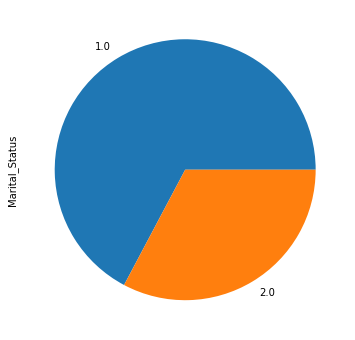

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Marital_Status'].value_counts().plot(kind = 'pie', figsize = (6,6))

Assuming that 1 - single, 2 - married. We see that we have more people who are single.

# How does cgpa depend on Marital Status?

In [14]:
df.groupby('CGPA')['Marital_Status'].agg(['mean'])

,mean
CGPA,
2.00 - 2.49,1.666667
3.00 - 3.49,1.263158
3.50 - 4.00,1.000000


<AxesSubplot:xlabel='CGPA'>

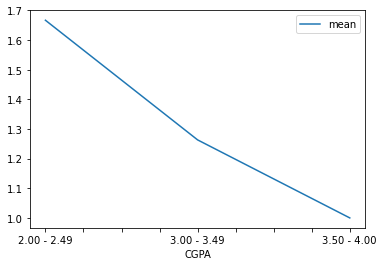

In [15]:
df.groupby('CGPA')['Marital_Status'].agg(['mean']).plot()

Let's assume that 1 - single, 2 - married. We see the dependence: unmarried people have a higher CGPA

# How does CGPA depend on gender ?

array([<AxesSubplot:ylabel='count'>], dtype=object)

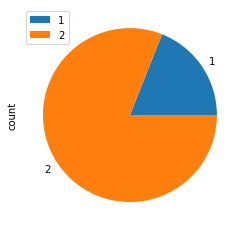

In [16]:
df.groupby('Gender')['Gender'].agg(['count']).plot.pie(subplots=True)

Assuming 1 - males , 2- female. We see that we have more females than males.

In [22]:
T1=df[df['Gender']==1]

array([<AxesSubplot:ylabel='count'>], dtype=object)

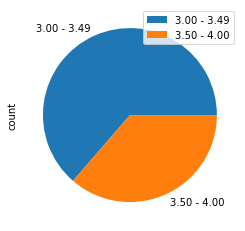

In [23]:
T1.groupby('CGPA')['Gender'].agg(['count']).plot.pie(subplots=True)

In [24]:
T2=df[df['Gender']==2]

array([<AxesSubplot:ylabel='count'>], dtype=object)

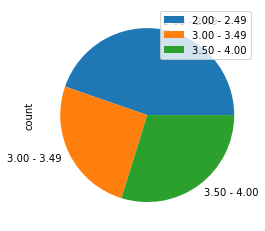

In [25]:
T2.groupby('CGPA',dropna=False)['Gender'].agg(['count']).plot.pie(subplots=True)

Women study more than men in this course but the rating of grades in men are better than in women.

# How does CGPA depend on sleep hours

In [27]:
T3=df.pivot_table(index='CGPA', columns='Gender', values='Sleep_hours', aggfunc='mean')
T3

Gender,1,2
CGPA,,
2.00 - 2.49,NaN,5.809524
3.00 - 3.49,6.285714,6.000000
3.50 - 4.00,6.250000,6.642857


<AxesSubplot:xlabel='CGPA'>

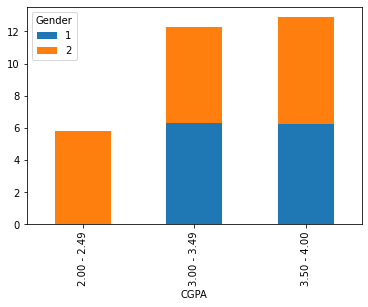

In [29]:
T3.plot.bar(stacked=True)

Students who slept more had better CGPA.

# On which days did the students study more?

In [34]:
T4=df.groupby('Day')['Study_hours'].agg(['mean'])
T4.sort_values('mean',ascending=False)

,mean
Day,
Friday,4.571429
Saturday,4.500000
Thursday,3.250000
Monday,3.000000
Sunday,2.666667
Tuesday,2.666667
Wednesday,2.500000


Students study  more on Fridays and Saturdays.

# Students perfomance.

In [36]:
T5=df.groupby(['Name','CGPA']).mean().sort_values('CGPA',ascending=False)
T5

,,Marital_Status,Gender,Study_hours,Sleep_hours,Weekend,Age
Name,CGPA,,,,,,
Faiza,3.50 - 4.00,1.0,2.0,3.000000,6.428571,0.285714,23.0
Rodela,3.50 - 4.00,1.0,2.0,4.428571,6.857143,0.285714,23.0
Sakif,3.50 - 4.00,1.0,1.0,2.750000,6.250000,0.000000,21.0
Karim,3.00 - 3.49,1.0,1.0,4.000000,6.285714,0.285714,23.0
Sanzida,3.00 - 3.49,1.0,2.0,3.000000,6.000000,0.285714,21.0
Tahmina,3.00 - 3.49,2.0,2.0,2.000000,6.000000,0.200000,22.0
Mariam,2.00 - 2.49,2.0,2.0,2.428571,6.000000,0.285714,22.0
Ritu,2.00 - 2.49,1.0,2.0,5.000000,5.857143,0.285714,24.0
Roshni,2.00 - 2.49,2.0,2.0,2.142857,5.571429,0.285714,23.0


3 best students are Faiza ,Rodela and Sakif.
Ritu and Roshni sleep less but their grades are poor.

# Conclusion

1. Unmarried people have a higher CGPA than married people.
2. There are more women in the group observed and women study more than men . But men have better than in women.
3. СGPA does not depend on the study hour.
4. Students spent more time on studying on Saturday and Friday.
5. Students who slept more had better CGPA.

In [38]:
# saving the dataframe
df.to_csv('Study Analysis')
